In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# CREATING AN EXAMPLE IMAGE (5x5 PIXELS)
image = np.array([
    [200, 200, 200, 200, 200],    
    [200, 200, 200, 200, 200],
    [0,0,0,0,0],
    [200, 200, 200, 200, 200],
    [200, 200, 200, 200, 200],

], dtype=np.float32)

In [4]:
# RESHAPING OUR IMAGE TO FIT OUR MODEL (batch_size, height, width, channels)
print(image.shape)
image = image.reshape((1,5,5,1))
image.shape

(5, 5)


(1, 5, 5, 1)

In [5]:
# CREATING A MODEL WITH A SINGLE CONVOLUTIONAL LAYER
model = models.Sequential([
    layers.Conv2D(filters=1, kernel_size=(3,3), padding="same", strides=(1,1), input_shape=(5,5,1)),
    layers.MaxPooling2D(pool_size=(2, 2))
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


in the code below, weights are hardcoded instead of learning them

In [6]:
# INITIALIZE THE WEIGHTS OF THE CONVOLUTIONAL LAYER WITH OUR VERTICAL EDGE DETECTION FILTER
weights = [np.array([[[[-1]],[[0]], [[1]]],
                    [[[-2]],[[0]], [[2]]],
                    [[[-1]],[[0]], [[1]]]], dtype=np.float32),
           np.array([0], dtype=np.float32)]
model.layers[0].set_weights(weights)

In [7]:
# APPLYING THE MODEL TO PREDICT THE RESULTS
output = model.predict(image)

I0000 00:00:1727117557.239836      85 service.cc:145] XLA service 0x7cba04002a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727117557.239894      85 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727117557.239899      85 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


I0000 00:00:1727117558.155387      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


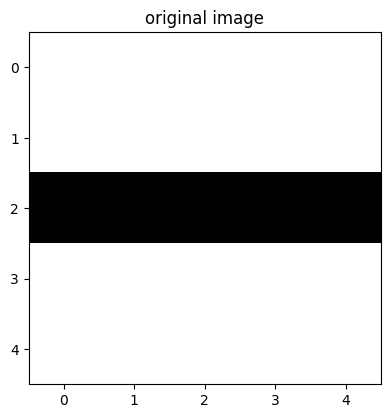

In [8]:
# DISPLAYING THE ORIGINAL IMAGE & THE FEATURE MAP AFTER CONVOLUTION & POOLING
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(image[0,:,:,0], cmap='gray')

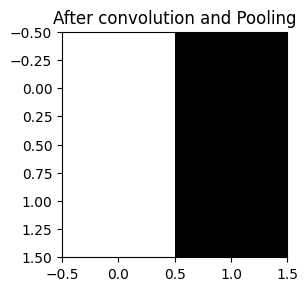

In [9]:
plt.subplot(1,2,2)
plt.title("After convolution and Pooling")
plt.imshow(output[0,:,:,0], cmap='gray')
plt.show()